In [ ]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
from sklearn.svm import SVC
dim = 100

In [ ]:
!unzip /content/drive/MyDrive/Tomato.zip -d MTP

Streaming output truncated to the last 5000 lines.
  inflating: MTP/dataset/train/Target_Spot/1 (1).JPG  
  inflating: MTP/dataset/train/Target_Spot/1 (10).JPG  
  inflating: MTP/dataset/train/Target_Spot/1 (100).JPG  
  inflating: MTP/dataset/train/Target_Spot/1 (1000).JPG  
  inflating: MTP/dataset/train/Target_Spot/1 (101).JPG  
  inflating: MTP/dataset/train/Target_Spot/1 (102).JPG  
  inflating: MTP/dataset/train/Target_Spot/1 (103).JPG  
  inflating: MTP/dataset/train/Target_Spot/1 (104).JPG  
  inflating: MTP/dataset/train/Target_Spot/1 (105).JPG  
  inflating: MTP/dataset/train/Target_Spot/1 (106).JPG  
  inflating: MTP/dataset/train/Target_Spot/1 (107).JPG  
  inflating: MTP/dataset/train/Target_Spot/1 (108).JPG  
  inflating: MTP/dataset/train/Target_Spot/1 (109).JPG  
  inflating: MTP/dataset/train/Target_Spot/1 (11).JPG  
  inflating: MTP/dataset/train/Target_Spot/1 (110).JPG  
  inflating: MTP/dataset/train/Target_Spot/1 (111).JPG  
  inflating: MTP/dataset/train/Target_Sp

In [ ]:
import os

# Define the paths for the train and test datasets
train_base_dir = '/content/MTP/dataset/train'
test_base_dir = '/content/MTP/dataset/val'

# List of class names to keep
class_names_to_keep = [
    "Late_blight", "Tomato_mosaic_virus", "healthy",
    "Septoria_leaf_spot", "Bacterial_spot", "Tomato_Yellow_Leaf_Curl_Virus"
]

# Create lists to store the file paths for train and test images
train_image_paths = []
test_image_paths = []

# Populate the train and test image paths based on the specified classes
for class_name in class_names_to_keep:
    train_image_paths.extend([os.path.join(train_base_dir, class_name, filename) for filename in os.listdir(os.path.join(train_base_dir, class_name))])
    test_image_paths.extend([os.path.join(test_base_dir, class_name, filename) for filename in os.listdir(os.path.join(test_base_dir, class_name))])


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions and batch size
image_height, image_width = 224, 224
batch_size = 32

# Define a function to load and preprocess the images, including labels
def load_and_preprocess_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [image_height, image_width])
    image = image / 255.0
    return image, label

# Create TensorFlow Datasets with labels
train_labels = [0 if "healthy" in path else 1 for path in train_image_paths]
test_labels = [0 if "healthy" in path else 1 for path in test_image_paths]

train_dataset = tf.data.Dataset.from_tensor_slices((train_image_paths, train_labels))
train_dataset = train_dataset.map(load_and_preprocess_image)
train_dataset = train_dataset.batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((test_image_paths, test_labels))
test_dataset = test_dataset.map(load_and_preprocess_image)
test_dataset = test_dataset.batch(batch_size)

# Define and compile the CNN model as before

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import precision_score, f1_score

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification, so using sigmoid activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training dataset
model.fit(train_dataset, epochs=10)

# Save the model weights
model.save_weights('model_weights.h5')

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test Accuracy: {test_accuracy}')

# Make predictions on the test dataset
predictions = model.predict(test_dataset)
binary_predictions = (predictions > 0.5).astype(int)

# Convert test_labels to a NumPy array
true_labels = np.array(test_labels).astype(int)

# Calculate precision and F1 score
precision = precision_score(true_labels, binary_predictions)
f1 = f1_score(true_labels, binary_predictions)

print(f'Precision: {precision}')
print(f'F1 Score: {f1}')


Epoch 1/10
188/188 [==============================] - 27s 84ms/step - loss: 5.4927 - accuracy: 0.9070
Epoch 2/10
188/188 [==============================] - 10s 53ms/step - loss: 1.7151 - accuracy: 0.8893
Epoch 3/10
188/188 [==============================] - 9s 47ms/step - loss: 0.9056 - accuracy: 0.7720
Epoch 4/10
188/188 [==============================] - 8s 43ms/step - loss: 0.6604 - accuracy: 0.7640
Epoch 5/10
188/188 [==============================] - 10s 54ms/step - loss: 0.6414 - accuracy: 0.8333
Epoch 6/10
188/188 [==============================] - 9s 50ms/step - loss: 0.6062 - accuracy: 0.8333
Epoch 7/10
188/188 [==============================] - 9s 47ms/step - loss: 0.5789 - accuracy: 0.8333
Epoch 8/10
188/188 [==============================] - 12s 62ms/step - loss: 0.5571 - accuracy: 0.8333
Epoch 9/10
188/188 [==============================] - 8s 42ms/step - loss: 0.5395 - accuracy: 0.8333
Epoch 10/10
19/19 [==============================] - 1s 52ms/step - loss: 0.5172 - accu

Epoch 1/10
188/188 [==============================] - 12s 57ms/step - loss: 6.1447 - accuracy: 0.8987 - val_loss: 9.6982 - val_accuracy: 0.8333
Epoch 2/10
188/188 [==============================] - 9s 46ms/step - loss: 1.2498 - accuracy: 0.8445 - val_loss: 6.3544 - val_accuracy: 0.8333
Epoch 3/10
188/188 [==============================] - 10s 55ms/step - loss: 1.2260 - accuracy: 0.8467 - val_loss: 55.4398 - val_accuracy: 0.8333
Epoch 4/10
188/188 [==============================] - 9s 50ms/step - loss: 4.2614 - accuracy: 0.8360 - val_loss: 0.6617 - val_accuracy: 0.8333
Epoch 5/10
188/188 [==============================] - 10s 52ms/step - loss: 0.6410 - accuracy: 0.8333 - val_loss: 0.6200 - val_accuracy: 0.8333
Epoch 6/10
188/188 [==============================] - 10s 55ms/step - loss: 0.6050 - accuracy: 0.8333 - val_loss: 0.5888 - val_accuracy: 0.8333
Epoch 7/10
188/188 [==============================] - 10s 53ms/step - loss: 0.5775 - accuracy: 0.8333 - val_loss: 0.5644 - val_accuracy: 

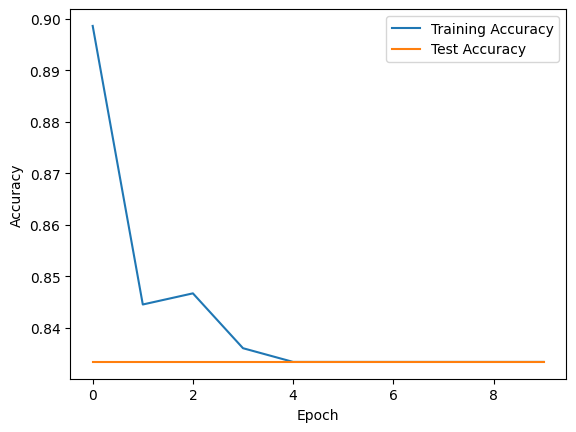

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import precision_score, f1_score

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification, so using sigmoid activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training dataset and get the history
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# Save the model weights
model.save_weights('model_weights.h5')

# Plot training and test accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Make predictions on the test dataset
predictions = model.predict(test_dataset)
binary_predictions = (predictions > 0.5).astype(int)

# Convert test_labels to a NumPy array
true_labels = np.array(test_labels).astype(int)

# Calculate precision and F1 score
precision = precision_score(true_labels, binary_predictions)
f1 = f1_score(true_labels, binary_predictions)

print(f'Precision: {precision}')
print(f'F1 Score: {f1}')


19/19 [==============================] - 1s 30ms/step
Precision: 0.8333333333333334
F1 Score: 0.9090909090909091
